## Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'

VOCAB_SIZE = 2500

## Load the Data

In [3]:
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')

prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[4., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## Calculating the Joint Probability

### Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [5]:
PROB_SPAM = 0.3116

### Joint probability in log format

In [6]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

In [7]:
joint_log_spam[:5]

array([-609.11347945, -171.76923907, -138.77860341, -429.67261243,
       -267.39676488])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1-P(Spam))} {P(X)}$$

In [8]:
joint_log_ham = X_test.dot(np.log(prob_token_ham )) + np.log(1-PROB_SPAM)

In [9]:
joint_log_ham[:5]

array([-653.84077417, -194.13257637, -137.83302812, -493.14861362,
       -285.66603157])

In [10]:
joint_log_ham.size

1722

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center><strong> OR </strong></center>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [11]:
prediciton = joint_log_spam > joint_log_ham

In [12]:
prediciton[-5:]*1

array([0, 0, 0, 0, 0])

In [13]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

### Simplify

$$P(X \, | \, Spam) \, P(Spam) ≠  \frac{P(X \, | \, Spam) \, P(Spam)}{P(X)}$$

## Metrics and Evaluation

### Accuracy

In [14]:
correct_docs = (y_test == prediciton).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly',numdocs_wrong)

Docs classified correctly 1677
Docs classified incorrectly 45


In [15]:
accuracy = correct_docs/len(X_test)
print('Accuracy :', accuracy)

Accuracy : 0.9738675958188153


In [16]:
fraction_wrong = numdocs_wrong/len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1-fraction_wrong))

Fraction classified incorrectly is 2.61%
Accuracy of the model is 97.39%


## Visualising the Results

In [17]:
yaxis_label = 'p(X | Spam)'
xaxis_label = 'P(X | Nonspam)'

linedata = np.linspace(start=-14000, stop=1, num=1000)

## The Decision Boundary

/home/anish/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


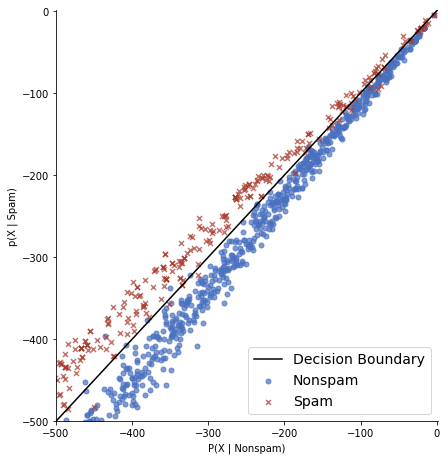

In [18]:
my_colours = ['#4A71C0', '#AB3A2C']
labels = 'Actual Category'
summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, labels:y_test})
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, size=6.5, fit_reg=False, legend=False,
          scatter_kws={'alpha': 0.7, 's': 25}, hue=labels, markers=['o', 'x'], palette=my_colours)

plt.xlim([-500, 1])
plt.ylim([-500, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14)

plt.show()

## False Positives and False Negatives

In [19]:
np.unique(prediciton, return_counts=True)

(array([False,  True]), array([1150,  572]))

In [20]:
true_pos = (y_test == 1) & (prediciton == 1)

In [21]:
true_pos.sum()

557

In [22]:
false_pos = (y_test == 0) & (prediciton == 1)
false_pos.sum()

15

In [23]:
false_neg = (y_test == 1) & (prediciton == 0)
false_neg.sum()

30

## Recall Score

In [24]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 94.89%


## Precision Score

In [25]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.974


## F-Score

In [26]:
f_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f_score))

F Score is 0.96
